<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.157276,14.313323,55.470599,159.989087,-104.518488
1,0.0,1.0,75.728583,-45.768166,39.960417,296.598738,-256.638321
2,0.0,2.0,24.130058,-532.585940,-498.455883,138.450885,-636.906768
3,0.0,3.0,50.979567,-2392.269040,-2331.289473,220.743784,-2552.033257
4,0.0,4.0,53.986502,1006.130871,1070.117373,229.959945,840.157427
...,...,...,...,...,...,...,...
29995,999.0,25.0,70.768023,-127.613012,-46.844989,-1166.553772,1119.708782
29996,999.0,26.0,36.538112,77.094931,123.633042,1176.609882,-1052.976840
29997,999.0,27.0,94.528790,-9977.363292,-9872.834503,-2793.065912,-7079.768591
29998,999.0,28.0,68.594934,908.982868,987.577802,-1017.797846,2005.375648


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    31.157276    14.313323    55.470599   159.989087  -104.518488
      1.0    75.728583   -45.768166    39.960417   296.598738  -256.638321
      2.0    24.130058  -532.585940  -498.455883   138.450885  -636.906768
      3.0    50.979567 -2392.269040 -2331.289473   220.743784 -2552.033257
      4.0    53.986502  1006.130871  1070.117373   229.959945   840.157427
...                ...          ...          ...          ...          ...
999.0 25.0   70.768023  -127.613012   -46.844989 -1166.553772  1119.708782
      26.0   36.538112    77.094931   123.633042  1176.609882 -1052.976840
      27.0   94.528790 -9977.363292 -9872.834503 -2793.065912 -7079.768591
      28.0   68.594934   908.982868   987.577802 -1017.797846  2005.375648
      29.0   48.686627 -2754.858895 -2696.172267   344.999169 -3041.171436

[30000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    31.157276    14.313323    55.470599   159.989087  -104.518488
      1.0    75.728583   -45.768166    39.960417   296.598738  -256.638321
      2.0    24.130058  -532.585940  -498.455883   138.450885  -636.906768
      3.0    50.979567 -2392.269040 -2331.289473   220.743784 -2552.033257
      4.0    53.986502  1006.130871  1070.117373   229.959945   840.157427
...                ...          ...          ...          ...          ...
999.0 25.0   70.768023  -127.613012   -46.844989 -1166.553772  1119.708782
      26.0   36.538112    77.094931   123.633042  1176.609882 -1052.976840
      27.0   94.528790 -9977.363292 -9872.834503 -2793.065912 -7079.768591
      28.0   68.594934   908.982868   987.577802 -1017.797846  2005.375648
      29.0   48.686627 -2754.858895 -2696.172267   344.999169 -3041.171436

[30000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.157276,14.313323,55.470599,159.989087,-104.518488
1,0.0,1.0,75.728583,-45.768166,39.960417,296.598738,-256.638321
2,0.0,2.0,24.130058,-532.585940,-498.455883,138.450885,-636.906768
3,0.0,3.0,50.979567,-2392.269040,-2331.289473,220.743784,-2552.033257
4,0.0,4.0,53.986502,1006.130871,1070.117373,229.959945,840.157427
...,...,...,...,...,...,...,...
29995,999.0,25.0,70.768023,-127.613012,-46.844989,-1166.553772,1119.708782
29996,999.0,26.0,36.538112,77.094931,123.633042,1176.609882,-1052.976840
29997,999.0,27.0,94.528790,-9977.363292,-9872.834503,-2793.065912,-7079.768591
29998,999.0,28.0,68.594934,908.982868,987.577802,-1017.797846,2005.375648


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1            e            Y        y_hat        e_hat
rep   index                                                               
0.0   0.0    31.157276    14.313323    55.470599   159.989087  -104.518488
      1.0    75.728583   -45.768166    39.960417   296.598738  -256.638321
      2.0    24.130058  -532.585940  -498.455883   138.450885  -636.906768
      3.0    50.979567 -2392.269040 -2331.289473   220.743784 -2552.033257
      4.0    53.986502  1006.130871  1070.117373   229.959945   840.157427
...                ...          ...          ...          ...          ...
999.0 25.0   70.768023  -127.613012   -46.844989 -1166.553772  1119.708782
      26.0   36.538112    77.094931   123.633042  1176.609882 -1052.976840
      27.0   94.528790 -9977.363292 -9872.834503 -2793.065912 -7079.768591
      28.0   68.594934   908.982868   987.577802 -1017.797846  2005.375648
      29.0   48.686627 -2754.858895 -2696.172267   344.999169 -3041.171436

[30000 rows x 5 columns]

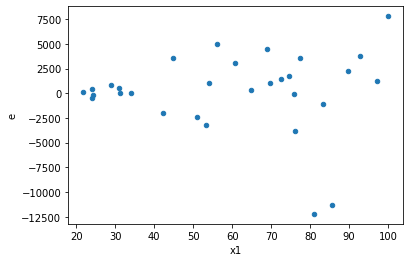

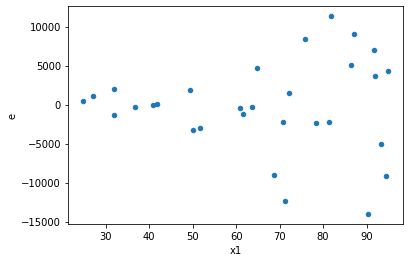

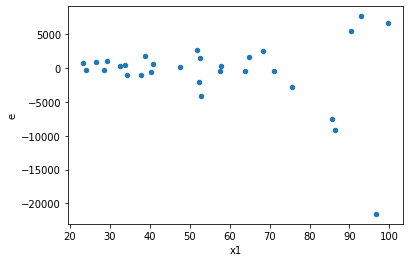

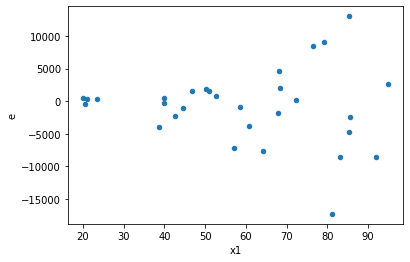

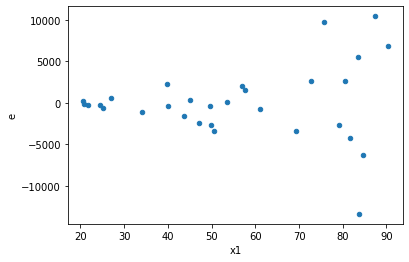

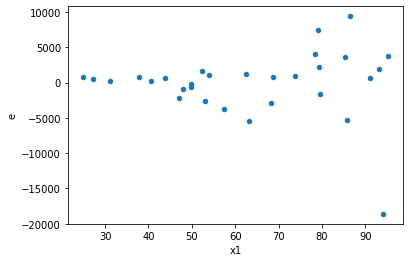

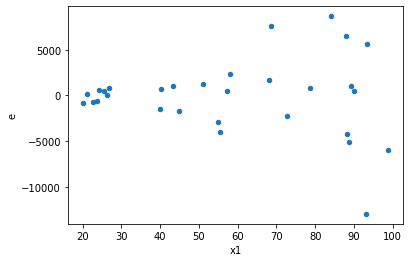

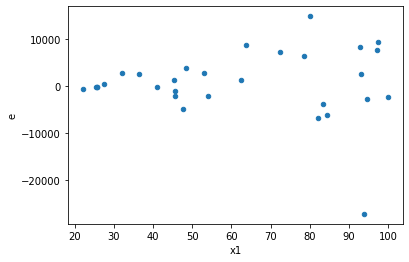

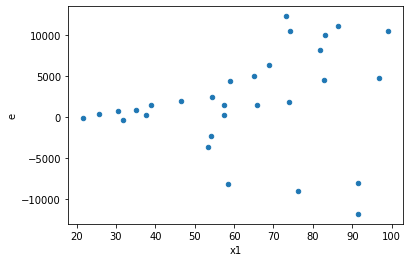

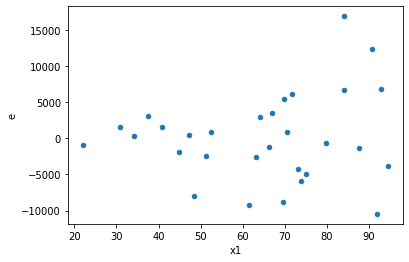

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,13.0,15.0,58604132.77099871,422375341.6239331,4508010.213153747,28158356.108262204,6.246293769721293,0.0012137832675356286,0.9993931083662322,0.0006068916337678143,Reject001=0 : Heteroscedasticity
1.0,9.0,19.0,22451755.418053858,962965166.8737024,2494639.490894873,50682377.20387907,20.316513624058107,1.2319547182393364e-07,0.9999999384022641,6.159773591196682e-08,Reject001=0 : Heteroscedasticity
2.0,18.0,10.0,39149457.30005166,707374648.7649171,2174969.85000287,70737464.87649171,32.52342319890015,3.073169208223092e-06,0.9999984634153959,1.536584604111546e-06,Reject001=0 : Heteroscedasticity
4.0,17.0,11.0,38887182.50774224,539744638.3291342,2287481.3239848376,49067694.39355766,21.45053333510097,9.411026304917414e-06,0.9999952944868475,4.705513152458707e-06,Reject001=0 : Heteroscedasticity
5.0,15.0,13.0,46061243.33718799,560806396.6040897,3070749.5558125325,43138953.58492998,14.048346438176148,2.3608347535342133e-05,0.9999881958262323,1.1804173767671067e-05,Reject001=0 : Heteroscedasticity
6.0,16.0,12.0,39867106.03249153,393443020.48526794,2491694.1270307205,32786918.373772327,13.158484429565014,6.064914728076687e-05,0.9999696754263596,3.0324573640383434e-05,Reject001=0 : Heteroscedasticity
9.0,9.0,19.0,77603670.95063177,929624897.1214361,8622630.105625752,48927626.164286114,5.674327387923524,0.0014622091551994565,0.9992688954224003,0.0007311045775997282,Reject001=0 : Heteroscedasticity
14.0,9.0,19.0,14553184.002488494,680879381.0802009,1617020.4447209437,35835756.898957945,22.161597904312384,5.958090065760757e-08,0.9999999702095497,2.9790450328803786e-08,Reject001=0 : Heteroscedasticity
17.0,15.0,13.0,102410883.98609003,547686626.4330506,6827392.265739336,42129740.49485005,6.170692828982756,0.0021007294763939477,0.998949635261803,0.0010503647381969738,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,15.0,58604132.77099871,422375341.6239331,4508010.213153747,28158356.108262204,6.246293769721293,0.0012137832675356286,Reject001=0 : Heteroscedasticity
1.0,9.0,19.0,22451755.418053858,962965166.8737024,2494639.490894873,50682377.20387907,20.316513624058107,1.2319547182393364e-07,Reject001=0 : Heteroscedasticity
2.0,18.0,10.0,39149457.30005166,707374648.7649171,2174969.85000287,70737464.87649171,32.52342319890015,3.073169208223092e-06,Reject001=0 : Heteroscedasticity
3.0,16.0,12.0,924632940.6308129,31076893.046733443,57789558.789425805,2589741.087227787,0.04481330436635297,2.033504314987229e-07,Reject001=0 : Heteroscedasticity
4.0,17.0,11.0,38887182.50774224,539744638.3291342,2287481.3239848376,49067694.39355766,21.45053333510097,9.411026304917414e-06,Reject001=0 : Heteroscedasticity
5.0,15.0,13.0,46061243.33718799,560806396.6040897,3070749.5558125325,43138953.58492998,14.048346438176148,2.3608347535342133e-05,Reject001=0 : Heteroscedasticity
6.0,16.0,12.0,39867106.03249153,393443020.48526794,2491694.1270307205,32786918.373772327,13.158484429565014,6.064914728076687e-05,Reject001=0 : Heteroscedasticity
7.0,12.0,16.0,1326055918.5803578,128739673.06554176,110504659.88169648,8046229.56659636,0.07281348655532222,4.819824731647158e-05,Reject001=0 : Heteroscedasticity
8.0,14.0,14.0,824209375.2943848,118863571.03796318,58872098.2353132,8490255.074140226,0.14421526204492444,0.0008634028332425839,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    914
Reject001=1 : Homoscedasticity       86
Name: Result_test, dtype: int64